# Board Game Review Predictions

## Data Acquisition
I retrieved Board Games data form  <b>Sean Beck (ThaWeatherman) Github Repository</b> which is available with MIT License, Note that there are 80000+ games data in the games.csv file. Generally, about 80% of the time spent in data analysis is cleaning and retrieving data, but this workload can be reduced by finding high-quality data sources. The games.csv file have lots of board game data which can be parsed in languages such as Python or R.
<br><br>
The complete data file is <a href="https://github.com/ThaWeatherman/scrapers/blob/master/boardgamegeek/games.csv">available for download</a> for those wanting to follow along.


In [17]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
1.0.5
3.2.2
0.10.1
0.23.1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

The following Python code loads in the csv data and displays the structure of the data:

In [19]:
# load the data
games = pandas.read_csv("games.csv")

In [20]:
#print top five rows
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [21]:
# Print the names of the columns in games
print(games.columns)

#Print the shape of the games data
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


The information is in the tidy data format with each row forming one observation, with the variable values in the columns.
If we look at the dimensions of the data, we notice only there are 81312 rows and 20 columns in the board gmaes data file.
And every column explain itself. 

## Identify Anomalies/ Missing Data
<br>
Looking through the data I noticed several missing data, which is a great reminder that data collected in the real-world will never be perfect. Missing data can impact an analysis as can incorrect data or outliers. In this case, the missing data will not have a large effect, and the data quality is good because of the source. We also can see there are 20 columns which represent 19 features and the one target (‘average_rating’).

In [22]:
# Descriptive statistics for each column
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


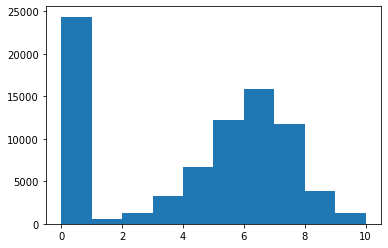

In [23]:
# Make a histogram of all the ratings in the average_rating column
plt.hist(games["average_rating"])
plt.show()

In [24]:
# print the number of rows of all the games with zero average rating scores
print(games[games["average_rating"]==0].shape)

# print the number of rows of all the games with non-zero average rating scores
print(games[games["average_rating"]>0].shape)

(24380, 20)
(56932, 20)


There are 24380 data points that immediately appear as zeros in average_rating column. Another method to verify the quality of the data is make basic plots like above histogram. Often it is easier to spot anomalies in a graph than in numbers.Examining the quantitative statistics and the graphs, we can feel confident to mark Identify Anomalies/ Missing Data in our dataset and now ready to make it the high quality of data.

In [25]:
# print the first row of all the games with zero scores
print(games[games["average_rating"]==0].iloc[0])

# print the first row of all the games with scores greater then 0
print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

# Removing Anomalies/ Missing Data

Cleaning data by removing Anomalies/Missing Data and games with zero rated by user. And how drawing the histogram and its looking good. 

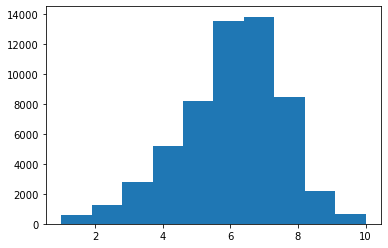

In [26]:
# Remove any rows without user reviews
games = games[games["users_rated"]>0]

# Remove any rows with missing values
games = games.dropna(axis=0)

# Make a histogram of all the average ratings
plt.hist(games["average_rating"])
plt.show()

In [27]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


Creating Correlation Matrix to find out the inter dependencies within different features(attributes)

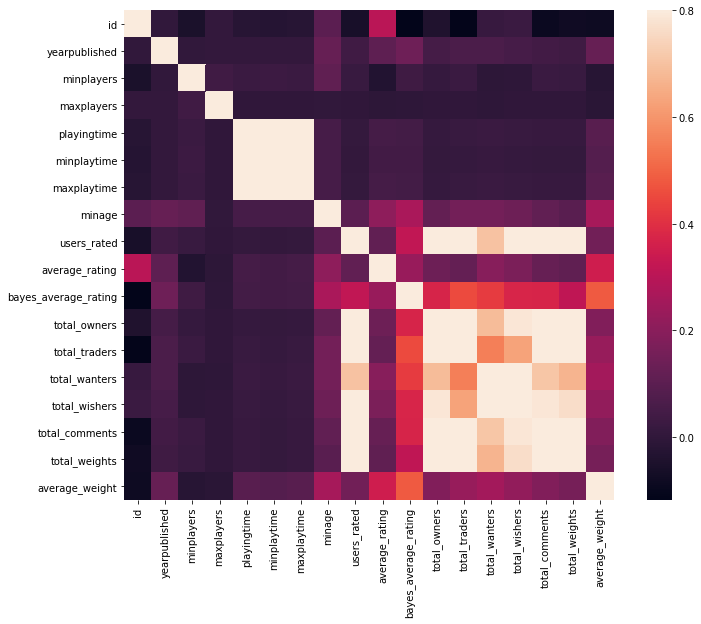

In [28]:
# Correlation Matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Removing the attributes form the games dataset that we don't want like byes_average_rating, average_rating (this is the target value), type, name and id.

In [29]:
# Get all the columns from the dataframe

columns = games.columns.tolist()

#filter the columns in the remove data we do not want
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

#store the variable  we will be predicting on

target = "average_rating"

# Training and Testing Sets
In this final step of data preparation: splitting data into training and testing sets. During training, we let the model ‘see’ the answers, in this case the Average Rating, so it can learn how to predict the Average Rating from the features. We expect there to be some relationship between all the features and the target value, and the model’s job is to learn this relationship during training. Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features (not the answers)! Because we do have the actual answers for the test set, we can compare these predictions to the true value to judge how accurate the model is. Generally, when training a model, we randomly split the data into training and testing sets to get a representation of all data points (if we trained on the first 80% games data of the dataset and then used the final 20% games data for prediction.
<br><br>
We can look at the shape of all the data to make sure we did everything correctly. We expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features :

In [30]:
# Generate training and test datasets
from sklearn.model_selection import train_test_split

# Generate training set
train = games.sample(frac = 0.8, random_state = 1)

# Select anything not in the training set and put it in test
test = games.loc[~games.index.isin(train.index)]

# Print shape
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


# Train a Linear Regression model
<br>
After all the work of data preparation, creating and training the model is pretty simple using Scikit-learn. We import the Linear regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. This entire process is only 3 lines in scikit-learn!

In [31]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
LR = LinearRegression()

#Fit the model the training data
LR.fit(train[columns], train[target])


LinearRegression()

# Make Predictions on the Test Set
<br>
Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers. When performing regression, we need to make sure to use the mean squared error because we expect some of our answers to be low and some to be high. We are interested in how far away our average prediction is from the actual value so we take the mean squared error.
<br>
The below code Generate prediciton for the test set  using Linear Regression and Compute error between test predictions and actual values

In [32]:
# Generate prediciton for the test set
predictions = LR.predict(test[columns])

# Compute error between test predictions and actual values
mean_squared_error(predictions, test[target])

2.078819032629326

Our average estimate is off by 2.0788 degrees. That is more than 1 degree. Although this might not seem significant.

# Train a Random Forest Regressor
<br>
As our average estimate above is more than 1 degree ,so to reduce it we try different model Random Forest Regressor model. creating and training the Random Forest Regressor model is pretty simple using Scikit-learn. We import the Random Forest Regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. This entire process is only 3 lines in scikit-learn!

In [33]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state = 1)

#Fit to the data
RFR.fit(train[columns], train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [36]:
# Generate prediciton for the test set
predictions = RFR.predict(test[columns])

# Calculate the absolute errors
error = abs(predictions - test[target])

# Compute error between test predictions and actual values
mean_squared_error(predictions, test[target])

1.4458560046071653

Our average estimate is off by 1.445856 degrees. That is more than 1 degree but better than Linear Regressor. Although this might not seem significant better than our prediction with Linear Regressor Model.

# Determine Performance Metrics
<br>
To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100%.

In [41]:
import numpy as np

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (error / test[target])

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.79 %.


That looks pretty good! Our model has learned how to predict the average rating with 79.79% accuracy.


# Compare predictions Generated by LR and RFR
<br>
Here comparing predictions generated by LR and RFR for a first test row

In [31]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [32]:
# Make pridictions iwth both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

#print out the predictions
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [33]:
# Print the actual value
test[target].iloc[0]

8.07933

# Conclusions
<br>
if we compare pridicted average rating by LR, RFR and actual value, we find that RFR is providing much more correct predictions